In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [1]:
# Importing libraies into notebook

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing py files into notebook
import env
from env import host, user, password
from env import get_db_url


In [2]:
sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                from properties_2017
                join propertylandusetype using (propertylandusetypeid)
                join  architecturalstyletype using (architecturalstyletypeid)
                where	propertylandusetypeid = '261'
            """

In [49]:
sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                from properties_2017
                join propertylandusetype using (propertylandusetypeid)
                
                where	propertylandusetypeid = '261'
            """

In [14]:
 # Read in DataFrame from Codeup db.
df = pd.read_sql(sql_query2, get_db_url('zillow'))

In [15]:
df.shape

(2152863, 7)

In [18]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [19]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [20]:
df.isna()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,False,False,True,False,True,True,False
1,False,False,True,False,True,True,False
2,False,False,True,False,True,True,False
3,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2152858,False,False,False,False,False,False,False
2152859,False,False,False,False,False,False,False
2152860,False,False,True,False,True,False,False
2152861,False,False,False,False,False,False,False


In [21]:
df[df.taxvaluedollarcnt.isna()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
10694,0.0,0.0,NaN,NaN,NaN,NaN,6111.0
10779,0.0,0.0,NaN,NaN,NaN,NaN,6111.0
26588,3.0,1.0,807.0,NaN,1924.0,NaN,6037.0
32251,0.0,0.0,NaN,NaN,NaN,NaN,6037.0
32656,2.0,2.0,1650.0,NaN,1987.0,51.86,6111.0
...,...,...,...,...,...,...,...
2131494,0.0,0.0,NaN,NaN,NaN,NaN,6037.0
2142029,0.0,0.0,NaN,NaN,NaN,NaN,6037.0
2142113,3.0,2.0,1432.0,NaN,1991.0,NaN,6037.0
2142169,0.0,0.0,NaN,NaN,NaN,NaN,6037.0


In [22]:
df[df.isna().any(axis=1)]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0


In [23]:
# What's the percentage of nulls?
df.isna().mean()

bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [24]:
# If we drop all rows containing any null, how much data do we have left?
round(df.dropna().shape[0] / df.shape[0], 4)

0.9941

In [25]:
# I'm comfortable dropping the rows with nulls
df = df.dropna()

In [28]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [26]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


**Takeaways**
- no null values
- convert columns `fips`, `bedroomcnt` and `yearbuilt` into int64. they are whole values

In [29]:
df = df.astype({'fips': 'int64', 'yearbuilt': 'int64', 'bedroomcnt': 'int64'})

In [30]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037


In [32]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  int64  
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  int64  
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 130.6 MB


In [39]:
from wrangle import wrangle_zillow

In [40]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037
...,...,...,...,...,...,...,...
2152856,4,4.0,4375.0,422400.0,2015,13877.56,6037
2152858,4,3.0,2262.0,960756.0,2015,13494.52,6059
2152859,4,4.5,3127.0,536061.0,2014,6244.16,6059
2152861,3,2.5,1974.0,424353.0,2015,5302.70,6059


In [43]:
# testing acquiring raw data function
import wrangle
tc = wrangle.new_familyhome_data()
tc.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


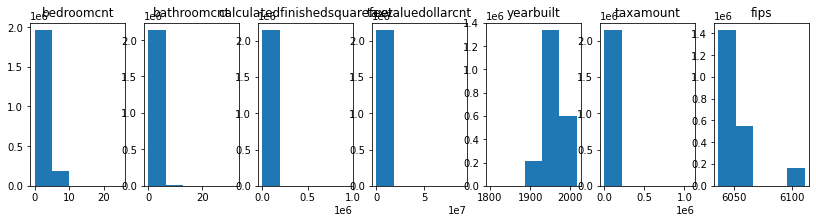

In [35]:
plt.figure(figsize=(16, 3))

# List of columns
for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,8, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

<AxesSubplot:>

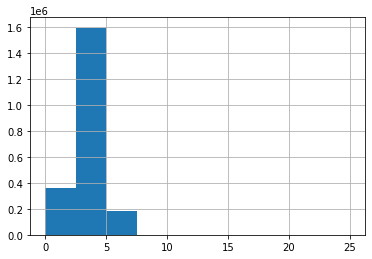

In [36]:
df.bedroomcnt.hist()

bedroomcnt


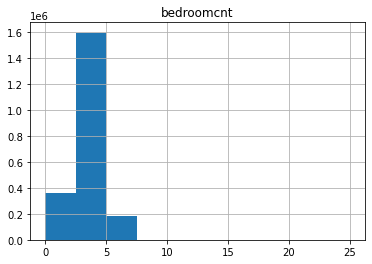

bathroomcnt


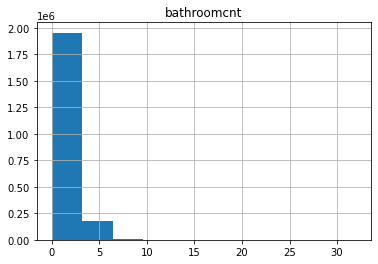

calculatedfinishedsquarefeet


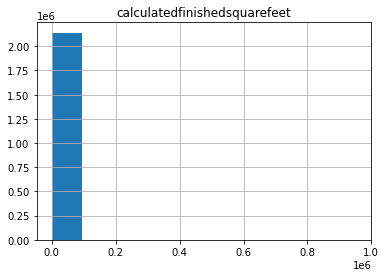

taxvaluedollarcnt


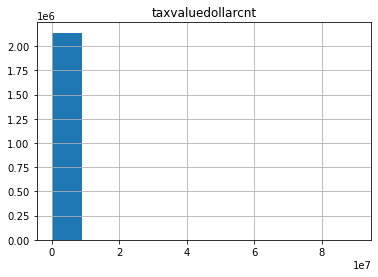

yearbuilt


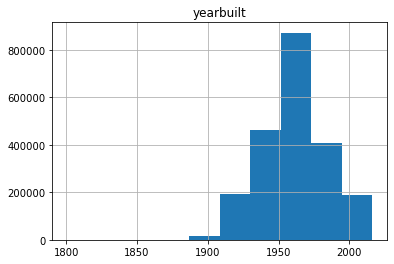

taxamount


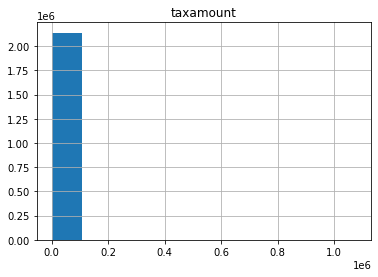

fips


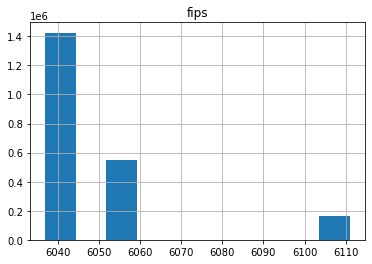

In [38]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

<AxesSubplot:>

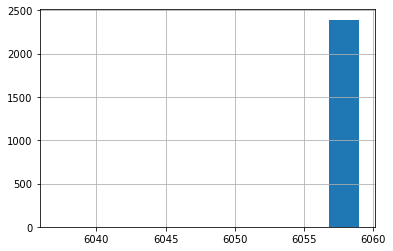

In [31]:
df.fips.hist()

<AxesSubplot:>

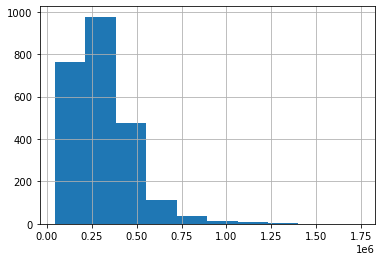

In [32]:
df.taxvaluedollarcnt.hist()

In [34]:
df.calculatedfinishedsquarefeet.sort_values(ascending=False)

1375    3016.0
1983    2838.0
656     2775.0
1712    2694.0
2177    2692.0
         ...  
1231     550.0
676      550.0
1379     550.0
762      550.0
2086     550.0
Name: calculatedfinishedsquarefeet, Length: 2393, dtype: float64

In [35]:
df.bedroomcnt.value_counts()

3.0    1163
2.0     840
4.0     271
1.0     103
5.0      14
6.0       2
Name: bedroomcnt, dtype: int64

In [36]:
df.bathroomcnt.value_counts()

2.5    809
2.0    762
1.5    518
1.0    180
3.0    101
3.5     20
4.0      3
Name: bathroomcnt, dtype: int64

In [37]:
df.taxvaluedollarcnt.value_counts()

207000.0    7
482243.0    5
381640.0    5
288956.0    4
393502.0    4
           ..
192504.0    1
212207.0    1
266625.0    1
138321.0    1
156610.0    1
Name: taxvaluedollarcnt, Length: 2109, dtype: int64

In [38]:
df.fips.value_counts()

6059.0    2392
6037.0       1
Name: fips, dtype: int64

<AxesSubplot:>

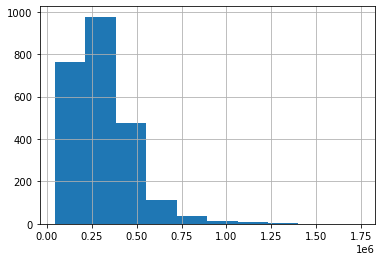

In [39]:
df.taxvaluedollarcnt.hist()

In [3]:
import wrangle
df = wrangle.wrangle_zillow()